# Scikit-Learn

In [19]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from pandas import DataFrame

from sklearn.datasets import load_iris, load_diabetes
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer

In [20]:
X,y = load_diabetes(return_X_y=True)
print(f"shape: {X.shape}, {y.shape}")
print(load_diabetes().keys())

shape: (442, 10), (442,)
dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [21]:
X,y = load_iris(return_X_y=True)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)
X_norm[:,0].std()

1.0

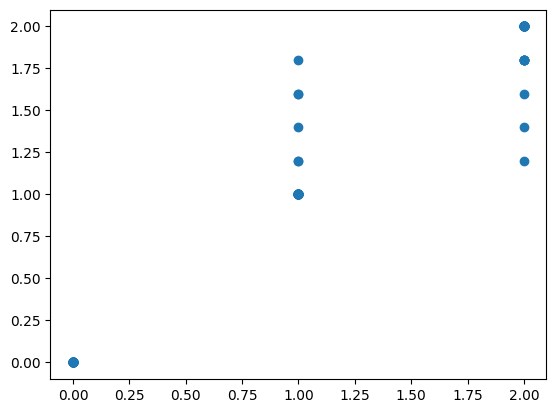

In [22]:
model = KNeighborsRegressor()
model.fit(X,y)
y_predict = model.predict(X)
plt.scatter(y, y_predict)

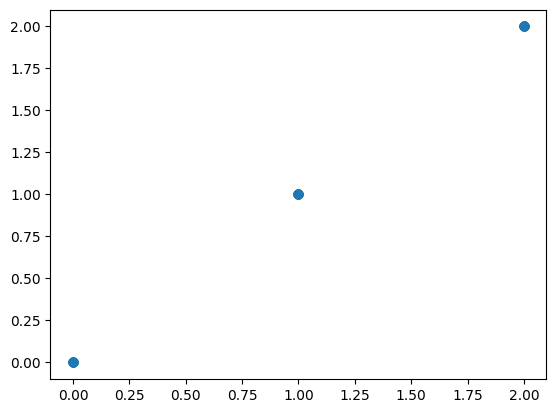

In [23]:
pipeline = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pipeline.fit(X,y)
y_predict = pipeline.predict(X)
plt.scatter(y, y_predict)

In [24]:
pipeline.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001719,0.000479,0.001419,0.000576,1,{'model__n_neighbors': 1},1.0,1.0,0.0,0.0,0.0,0.0,0.333333,0.471405,1
1,0.001134,0.000016,0.031678,0.068905,2,{'model__n_neighbors': 2},1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.372678,2
2,0.001411,0.000204,0.000998,0.000159,3,{'model__n_neighbors': 3},1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.372678,2
3,0.002064,0.000863,0.001373,0.000122,4,{'model__n_neighbors': 4},1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.372678,2
4,0.001564,0.000148,0.001355,0.000361,5,{'model__n_neighbors': 5},1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.372678,2
5,0.001253,0.000081,0.000945,0.000059,7,{'model__n_neighbors': 7},1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.372678,2
6,0.001223,0.000051,0.000923,0.000034,8,{'model__n_neighbors': 8},1.0,0.0,0.0,0.0,0.0,0.0,0.166667,0.372678,2


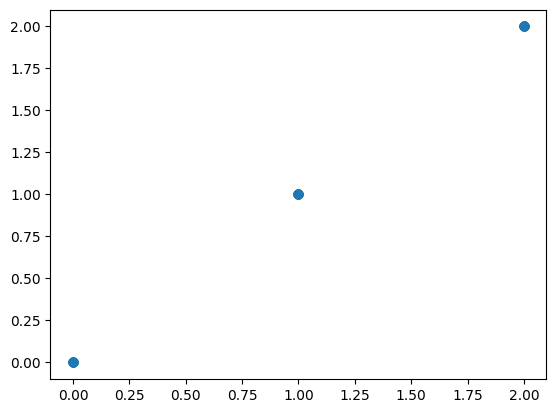

In [25]:
clf = GridSearchCV(pipeline, {'model__n_neighbors': [1,2,3,4,5,7,8]}, cv=6)
clf.fit(X,y)
y_predict = clf.predict(X)
plt.scatter(y,y_predict)
DataFrame(clf.cv_results_)